# Modules 2

## Matplotlib

Some things in these exercises have not been fully explained in class. You have to do your own research in order to successfully complete some of them.

In [2]:
import matplotlib.pyplot as plt

### Basic Line Plot

Plot the numbers 1, 2, 3, 4, 5 on the Y-axis against the numbers 2, 3, 4, 5, 6 on the X-axis.

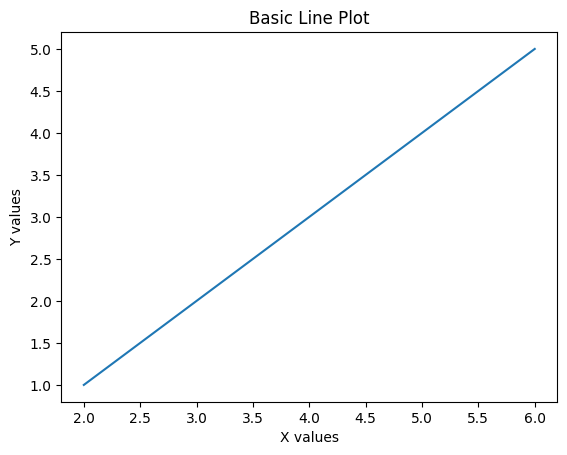

In [8]:
x = [2, 3, 4 , 5, 6]
y = [1, 2, 3, 4, 5]

plt.plot(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Basic Line Plot')
plt.show()

### Multiple Line Plots in One Graph

Plot two lines in the same graph:
- X-axis values: 1, 2, 3, 4, 5
- First Y-axis values: $(x^3)$
- Second Y-axis values: $(x^3 + 5x^2 + x)$

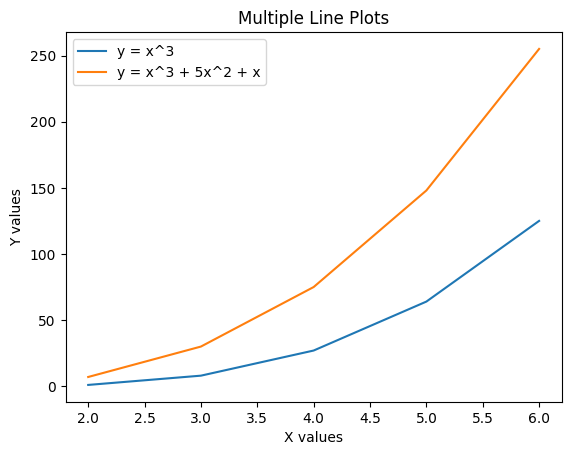

In [11]:
X = [1, 2, 3, 4, 5]
y1 = [x**3 for x in X]
y2 = [x**3 + 5*x**2 + x for x in X]

plt.plot(x, y1, label='y = x^3')
plt.plot(x, y2, label='y = x^3 + 5x^2 + x')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Multiple Line Plots')
plt.legend()
plt.show()

### Combined Line and Bar Chart

Use the following data:
- Months: January, February, March, April
- Sales (for line plot): 100, 120, 140, 160
- Costs (for bar chart): 80, 85, 88, 90

Plot Sales data as a line plot and Costs data as a bar chart on the same graph.

**Hint**: You might want to use `twinx()` for dual Y axes.

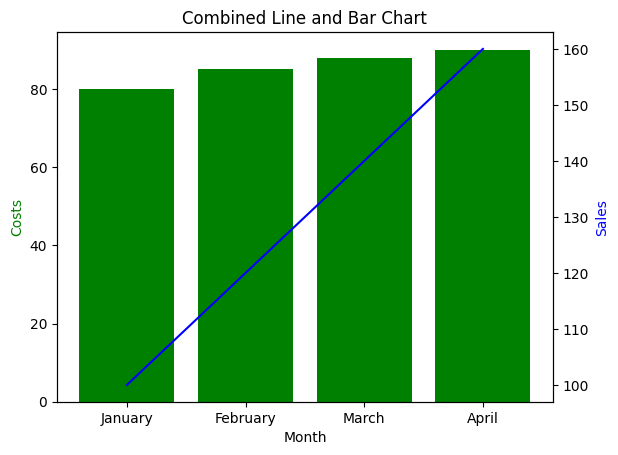

In [19]:
months = ['January', 'February', 'March', 'April']
sales = [100, 120, 140, 160]
costs = [80, 85, 88, 90]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(months, costs, color='g')
ax2.plot(months, sales, color='b')

ax1.set_xlabel('Month')
ax1.set_ylabel('Costs', color='g')
ax2.set_ylabel('Sales', color='b')
plt.title('Combined Line and Bar Chart')
plt.show()

### Subplots with Different Charts

Using the data:
- X-values: 1, 2, 3, 4, 5
- Y-values: 2, 3, 5, 7, 11

Create a 2x2 grid of plots:
- A line chart.
- A scatter plot.
- A bar chart.
- A histogram of Y-values.

**Hint**: Check `plt.subplots()` and how to plot with the axis returned by subplots.

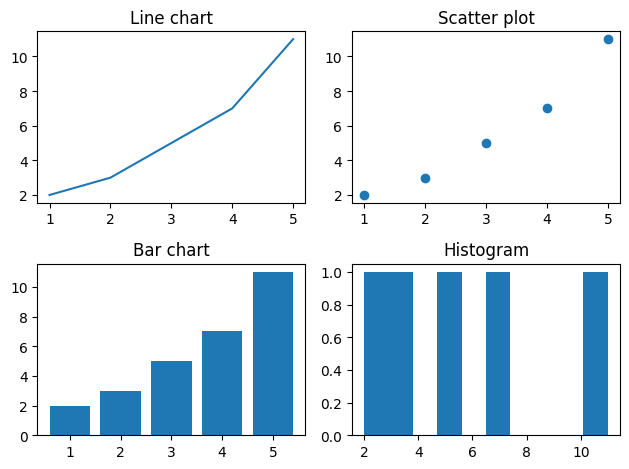

In [20]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

fig, axs = plt.subplots(2, 2)

# Line chart
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Line chart')

# Scatter plot
axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Scatter plot')

# Bar chart
axs[1, 0].bar(x, y)
axs[1, 0].set_title('Bar chart')

# Histogram
axs[1, 1].hist(y)
axs[1, 1].set_title('Histogram')

plt.tight_layout()
plt.show()

### Customized Scatter Plot

For the data:
- X-values: 1, 2, 3, 4, 5
- Y-values: 5, 4, 8, 6, 9
- Size: 100, 200, 300, 400, 500
- Color: red, blue, green, yellow, pink

Create a scatter plot where each point has a unique size and color.

Add a legend describing each point.

**Hint**: You can create one scatter plot for each X and overlap all of them in the same chart.

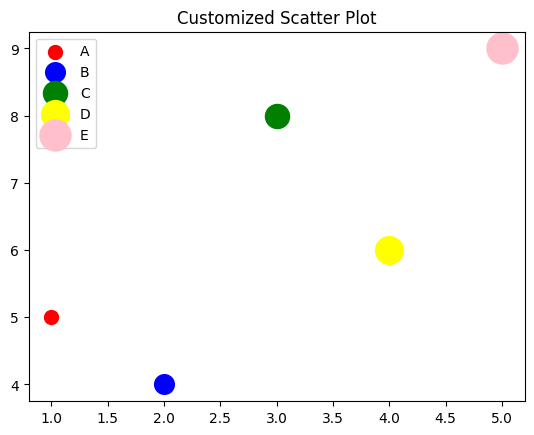

In [22]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 8, 6, 9]
sizes = [100, 200, 300, 400, 500]
colors = ['red', 'blue', 'green', 'yellow', 'pink']
labels = ['A', 'B', 'C', 'D', 'E']

for i in range(len(x)):
    plt.scatter(x[i], y[i], s=sizes[i], c=colors[i], label=labels[i])

plt.legend()
plt.title('Customized Scatter Plot')
plt.show()

### Stacked Bar Chart

Given:
- Categories: A, B, C
- Value set 1: 3, 4, 5
- Value set 2: 1, 2, 1

Create a stacked bar chart representing the data.

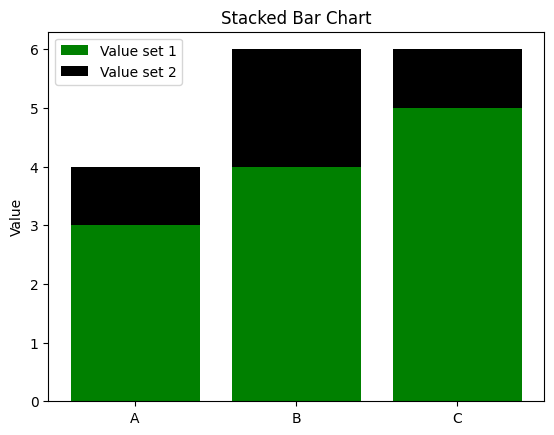

In [25]:
categories = ['A', 'B', 'C']
values1 = [3, 4, 5]
values2 = [1, 2, 1]

plt.bar(categories, values1, label='Value set 1', color='g')
plt.bar(categories, values2, label='Value set 2', color='k', bottom=values1)

plt.ylabel('Value')
plt.title('Stacked Bar Chart')
plt.legend()
plt.show()

## Pandas

In [26]:
import pandas as pd

### Employees

Use `datasets/Employees.csv` for the following exercises.

In [128]:
df = pd.read_csv("datasets/Employees.csv")
df

,Name,Age,Department,Salary,JoiningDate
0,Alice,28,HR,60000,2020-01-15
1,Bob,32,IT,80000,2019-11-20
2,Charlie,25,Finance,75000,2021-03-25
3,David,35,HR,62000,2018-06-07
4,Eve,40,IT,85000,2017-08-19
5,Frank,29,Sales,55000,2022-01-01
6,Grace,22,Finance,72000,2022-04-10


#### Average age

Calculate the average age of the employees.

In [39]:
df['Age'].mean()

30.142857142857142

#### Total salary

Calculate the sum of all the salaries the company has to pay each year.

In [40]:
df['Salary'].sum()

489000

#### Department-wise Average Age

Calculate the average age of employees in each department.

In [38]:
df.groupby('Department')['Age'].mean()

Department
Finance    23.5
HR         31.5
IT         36.0
Sales      29.0
Name: Age, dtype: float64

#### Filter and Sort

Filter out employees who joined after January 1, 2020, and sort them by their salary in descending order.

In [41]:
filtered_df = df[df['JoiningDate'] > '2020-01-01']
filtered_df.sort_values(by='Salary', ascending=False)

,Name,Age,Department,Salary,JoiningDate
2,Charlie,25,Finance,75000,2021-03-25
6,Grace,22,Finance,72000,2022-04-10
0,Alice,28,HR,60000,2020-01-15
5,Frank,29,Sales,55000,2022-01-01


#### Employees' Tenure

Add a column Tenure to the dataframe which represents how many years an employee has worked until today.

In [131]:
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])
df['Tenure'] = ((pd.to_datetime('2023-08-06') - df['JoiningDate']).dt.days / 365).round(2)
df

,Name,Age,Department,Salary,JoiningDate,Tenure
0,Alice,28,HR,60000,2020-01-15,3.56
1,Bob,32,IT,80000,2019-11-20,3.71
2,Charlie,25,Finance,75000,2021-03-25,2.37
3,David,35,HR,62000,2018-06-07,5.17
4,Eve,40,IT,85000,2017-08-19,5.97
5,Frank,29,Sales,55000,2022-01-01,1.59
6,Grace,22,Finance,72000,2022-04-10,1.32


#### Department Salary Budget
Calculate the total salary budget for each department.

In [49]:
df.groupby('Department')['Salary'].sum()

Department
Finance    147000
HR         122000
IT         165000
Sales       55000
Name: Salary, dtype: int64

#### Rename and Transform
Rename the column 'JoiningDate' to 'StartDate' and convert the 'Salary' column from yearly to monthly (divided by 12).

In [132]:
df = df.rename(columns={'JoiningDate': 'StartDate'})
df['Salary'] = (df['Salary'] / 12).round(2)
df

,Name,Age,Department,Salary,StartDate,Tenure
0,Alice,28,HR,5000.00,2020-01-15,3.56
1,Bob,32,IT,6666.67,2019-11-20,3.71
2,Charlie,25,Finance,6250.00,2021-03-25,2.37
3,David,35,HR,5166.67,2018-06-07,5.17
4,Eve,40,IT,7083.33,2017-08-19,5.97
5,Frank,29,Sales,4583.33,2022-01-01,1.59
6,Grace,22,Finance,6000.00,2022-04-10,1.32


#### Oldest Employee in Each Department

Find the name and age of the oldest employee in each department.

In [53]:
df.loc[df.groupby('Department')['Age'].idxmax()][['Department', 'Name', 'Age']]

,Department,Name,Age
2,Finance,Charlie,25
3,HR,David,35
4,IT,Eve,40
5,Sales,Frank,29


#### Count Employees in Each Department
Find out how many employees work in each department.



In [54]:
df['Department'].value_counts()

HR         2
IT         2
Finance    2
Sales      1
Name: Department, dtype: int64

#### Salary Distribution

Plot a histogram of employee salaries to observe the distribution of monthly salaries in the company.

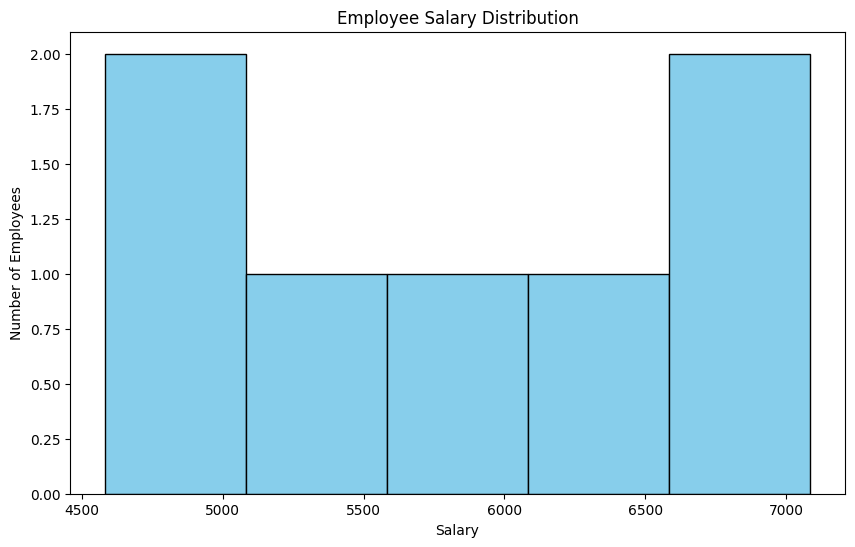

In [89]:
plt.figure(figsize=(10,6))
plt.hist(df['Salary'], bins=5, edgecolor='black', color='skyblue')
plt.title('Employee Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

#### Tenure Distribution

Create a bar chart that shows the number of employees that fall into each of the following tenure groups: 0-1 year, 1-3 years, 3-5 years, 5+ years.

**Hint**: Check `pd.cut()` for partitioning the data.

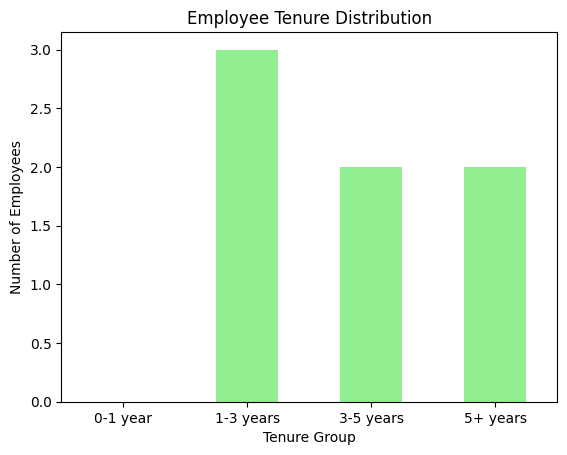

In [104]:
# Categorize tenure
tenure_bins = [0, 1, 3, 5, df['Tenure'].max()+1]
tenure_labels = ['0-1 year', '1-3 years', '3-5 years', '5+ years']
df['Tenure Group'] = pd.cut(df['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Plotting
tenure_counts = df['Tenure Group'].value_counts(sort=False)
tenure_counts.plot(kind='bar', color='lightgreen')
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

#### Employee Salary vs. Years at Company

Use a scatter plot to visualize the relationship between an employee's salary and their tenure at the company.

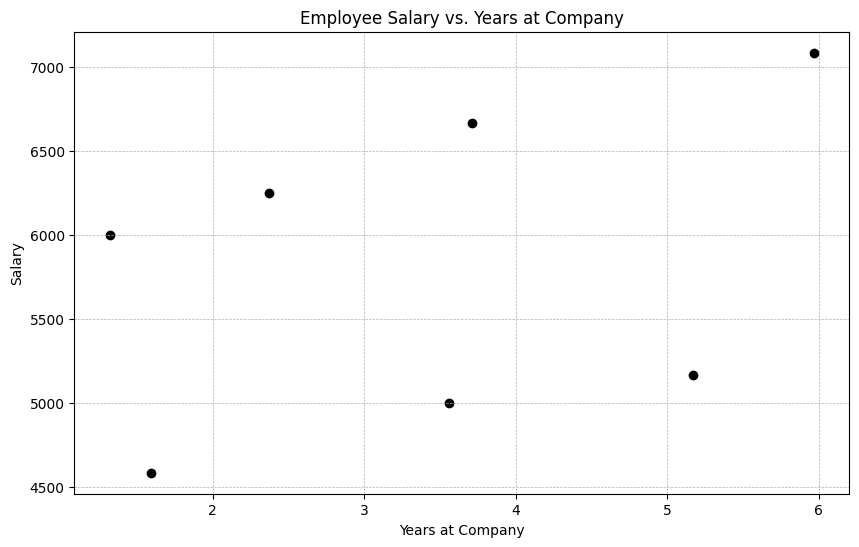

In [135]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tenure'], df['Salary'], color='black')
plt.title('Employee Salary vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Salary')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Transactions

Use `datasets/Transactions.csv` for the following exercises.

In [106]:
df = pd.read_csv("datasets/Transactions.csv")
df['Date'] = pd.to_datetime(df['Date'])
df

,CustomerID,Product,Quantity,Price,Date
0,1001,Laptop,1,1200,2022-01-15
1,1002,Chair,5,60,2022-01-17
2,1003,Desk,2,150,2022-01-20
3,1001,Mouse,2,25,2022-01-25
4,1004,Laptop,1,1200,2022-01-30
5,1002,Desk Lamp,3,40,2022-02-02
6,1005,Chair,4,60,2022-02-03
7,1003,Monitor,2,250,2022-02-05
8,1001,Keyboard,1,90,2022-02-10
9,1004,Mouse,1,25,2022-02-15


#### Monthly Sales
Calculate the total sales for each month. Sales for a transaction are calculated as `Quantity * Price`.

In [107]:
df['Sales'] = df['Quantity'] * df['Price']
df.groupby(df['Date'].dt.month)['Sales'].sum()

Date
1    3050
2     975
Name: Sales, dtype: int64

#### Top Products by Sales
List the top 3 products by total sales.

In [63]:
product_sales = df.groupby('Product')['Sales'].sum()
product_sales.sort_values(ascending=False)[:3]

Product
Laptop     2400
Chair       540
Monitor     500
Name: Sales, dtype: int64

#### Customer Lifetime Value
Calculate the lifetime value of each customer, which is the sum of all their sales.

In [64]:
df.groupby('CustomerID')['Sales'].sum()

CustomerID
1001    1340
1002     420
1003     800
1004    1225
1005     240
Name: Sales, dtype: int64

#### Customer Segmentation
Segment customers into three categories:
- High Value: Lifetime value greater than 1,300€
- Medium Value: Lifetime value between 800€ and 1,300€
- Low Value: Lifetime value less than 800€

In [76]:
def segment_customer(ltv):
    if ltv > 1300:
        return 'High Value'
    elif ltv >= 800:
        return 'Medium Value'
    return 'Low Value'

df.groupby('CustomerID')['Sales'].sum().apply(segment_customer)

CustomerID
1001      High Value
1002       Low Value
1003    Medium Value
1004    Medium Value
1005       Low Value
Name: Sales, dtype: object

#### Repeat Customers
Identify customers who have made more than two purchases.

In [77]:
purchase_counts = df['CustomerID'].value_counts()
purchase_counts[purchase_counts > 2]

1001    3
Name: CustomerID, dtype: int64

#### Products Not Purchased
List all products that were not purchased by a specific customer, say CustomerID `1001`.

In [80]:
customer_id = 1001
purchased_products = df[df['CustomerID'] == customer_id]['Product'].unique()
all_products = df['Product'].unique()

# not purchased
set(all_products) - set(purchased_products)

{'Chair', 'Desk', 'Desk Lamp', 'Monitor'}

#### Transactions Over Time

Plot a line chart showing the number of sales that occurred on each date (sorted ascendingly).

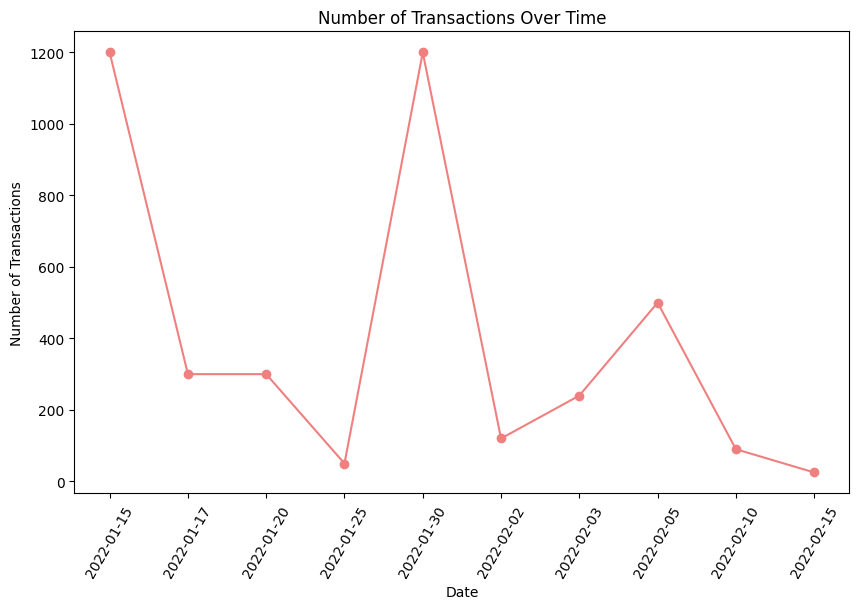

In [123]:
daily_sales = df.sort_values('Date')['Sales']
daily_sales.plot(kind='line', figsize=(10,6), color='lightcoral', marker='o')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.xticks(range(len(df)), df['Date'].dt.date, rotation=60)
plt.ylabel('Number of Transactions')
plt.show()

#### Product Popularity

Use a bar chart to display the total quantity sold for each product.

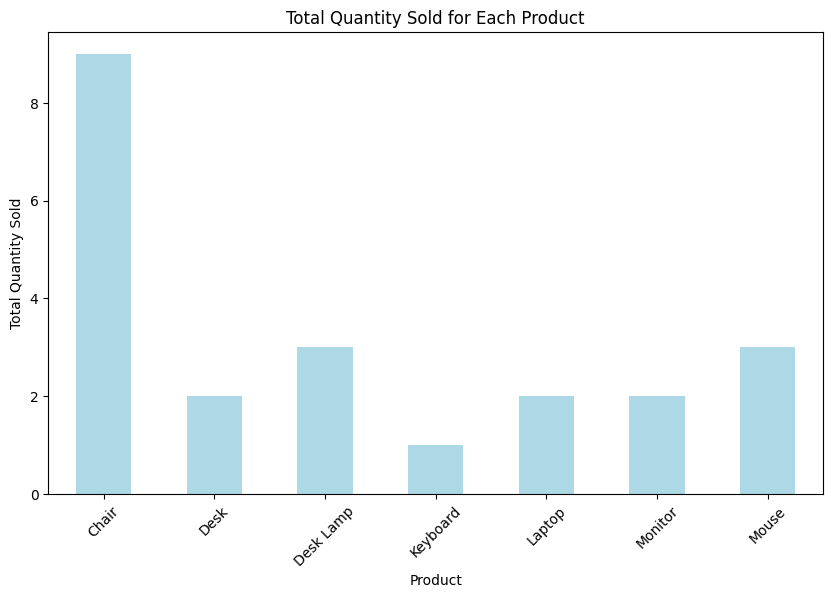

In [125]:
product_sales = df.groupby('Product')['Quantity'].sum()

product_sales.plot(kind='bar', figsize=(10,6), color='lightblue')
plt.title('Total Quantity Sold for Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### Bank Marketing

The Bank Marketing Dataset contains data related to direct marketing campaigns (via phone calls) of a real Portuguese banking institution.

In [136]:
df = pd.read_csv('datasets/bank-full.csv', delimiter=';')

#### Data Overview

- Load the dataset and view the first 5 rows.
- Determine the total number of rows and columns in the dataset.
- Check for any missing values.

In [137]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [138]:
df.shape

(45211, 17)

In [140]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Campaign Analysis

Calculate the success rate of the campaign, i.e., the proportion of clients who subscribed to a term deposit. Clients who subscribed are the ones marked as 'yes' on the `y` column.

In [149]:
df[df['y'] == 'yes'].shape[0] / df.shape[0]

0.11698480458295547

#### Jobs & Subscriptions

- Identify the job category with the highest number of subscriptions for the term deposit.
- Plot a bar chart showing the number of subscriptions per job category.

In [151]:
# Job category with the highest number of subscriptions
job_subs = df[df['y'] == 'yes']['job'].value_counts()
job_subs

management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: job, dtype: int64

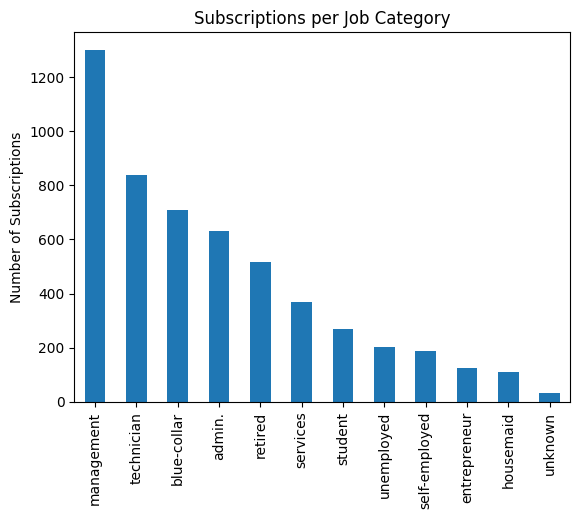

In [153]:
job_subs.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Number of Subscriptions')
plt.title('Subscriptions per Job Category')
plt.show()

#### Age Analysis

Segment the clients into age groups by creating a new column `age_group`:
- Young (age < 30)
- Middle-aged (30 ≤ age < 50)
- Senior (age ≥ 50)

Then calculate the subscription rate for each age group.

In [156]:
# Segment clients into age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, df['age'].max()], labels=['Young', 'Middle-aged', 'Senior'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Senior
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Middle-aged
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Middle-aged
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Middle-aged
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Middle-aged


In [158]:
# Subscription rate for each age group
df[df['y'] == 'yes']['age_group'].value_counts() / df['age_group'].value_counts()

Middle-aged    0.097870
Senior         0.141869
Young          0.162873
Name: age_group, dtype: float64

#### Subscription vs. Loan

Analyze the impact of having a personal loan (`loan` column is `"yes"`) on subscribing to a term deposit. Is having a loan significantly affecting the subscription rate?

In [166]:
df[df['loan'] == 'no']['y'].value_counts(normalize=True)

no     0.873443
yes    0.126557
Name: y, dtype: float64

In [163]:
df[df['loan'] == 'yes']['y'].value_counts(normalize=True)

no     0.933186
yes    0.066814
Name: y, dtype: float64

We see that 13% people without a loan, subscribe; while only 7% of people with a loan subscribe.

#### Duration Analysis

Understand the effect of contact duration (`duration`) on the subscription outcome. Do longer calls correlate with higher subscription rates?

In [ ]:
groups = df.groupby('y')['duration']

In [174]:
# Average "yes" duration
groups.get_group('yes').mean().round(2)

537.29

In [175]:
# Average "no" duration
groups.get_group('no').mean().round(2)

221.18

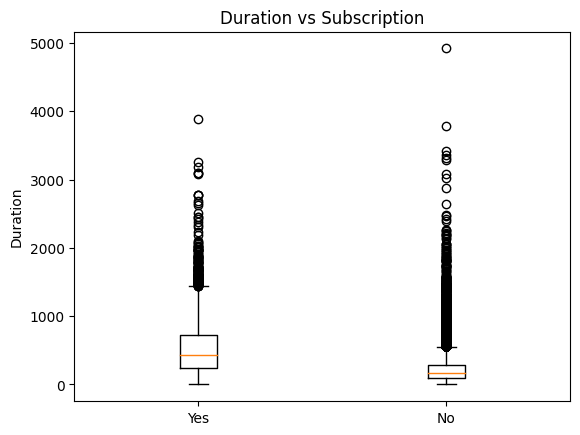

In [176]:
# Effect of last contact duration on subscription
plt.boxplot([groups.get_group('yes'), groups.get_group('no')], labels=['Yes', 'No'])
plt.ylabel('Duration')
plt.title('Duration vs Subscription')
plt.show()

#### Month-wise Analysis

- Determine which month had the highest number of contacts.
- Which month had the highest subscription rate?

In [178]:
# Month with the highest number of contacts
df['month'].value_counts().idxmax()

'may'

In [181]:
# Month with highest subscription rate
(df[df['y'] == 'yes']['month'].value_counts() / df['month'].value_counts()).sort_values(ascending=False)

mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110133
jun    0.102228
nov    0.101511
jan    0.101212
jul    0.090935
may    0.067195
Name: month, dtype: float64

#### Education & Subscriptions

- Group clients based on their education level and determine the subscription rates for each group.
- Plot the subscription rates against education levels. Which group is most likely to subscribe to a term deposit?

In [182]:
# Grouping by education and finding subscription rates
education_subs_rate = df[df['y'] == 'yes']['education'].value_counts() / df['education'].value_counts()
education_subs_rate

secondary    0.105594
tertiary     0.150064
primary      0.086265
unknown      0.135703
Name: education, dtype: float64

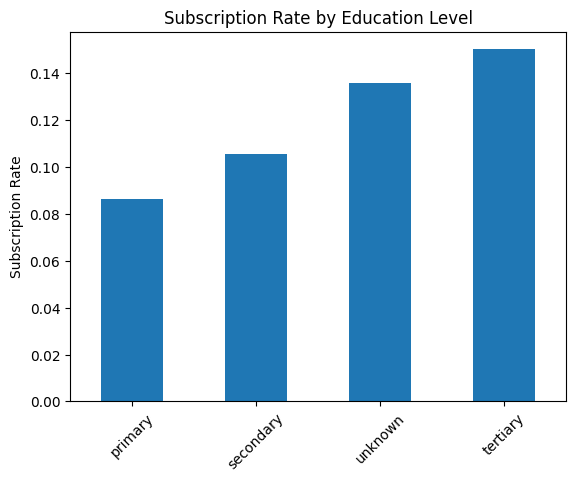

In [183]:
# Plotting
education_subs_rate.sort_values().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Education Level')
plt.show()

#### Housing Loans & Subscriptions

Determine the proportion of clients with a housing loan.

In [192]:
round(df[df['housing'] == 'yes'].shape[0] / df.shape[0], 2)

0.56

#### Effect of Marital Status

- Plot the distribution of the clients based on marital status.
- Calculate the subscription rate for each marital status group.

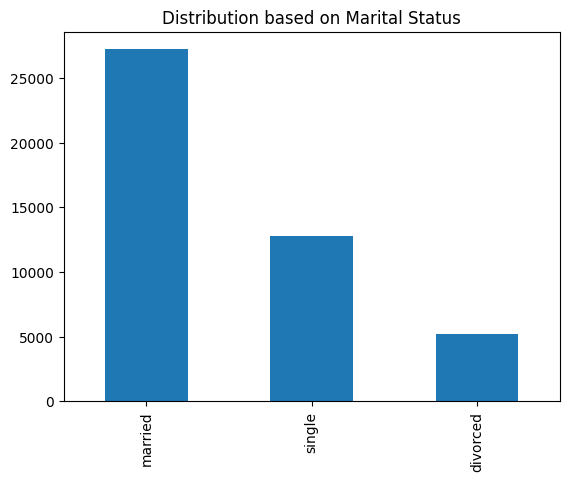

In [196]:
# Plot the distribution based on marital status
df['marital'].value_counts().plot(kind='bar', title='Distribution based on Marital Status')
plt.show()

In [197]:
# Subscription rate for each marital status group
df[df['y'] == 'yes']['marital'].value_counts() / df['marital'].value_counts()

married     0.101235
single      0.149492
divorced    0.119455
Name: marital, dtype: float64

#### Balance Analysis

Segment the clients into balance groups (create a new column `balance_broup`:
- Negative Balance
- Low (0 to 1000)
- Medium (1000 to 5000)
- High (>5000)

Determine the group that has the highest number of term deposit subscriptions.

In [200]:
# Segment clients into balance groups
df['balance_group'] = pd.cut(df['balance'],
                             bins=[-float('inf'), 0, 1000, 5000, float('inf')],
                             labels=['Negative Balance', 'Low', 'Medium', 'High'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Senior,Medium
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Middle-aged,Low
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Middle-aged,Low
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Middle-aged,Medium
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Middle-aged,Low


In [202]:
# Group with the highest number of term deposit subscriptions
df[df['y'] == 'yes']['balance_group'].value_counts()

Low                 2539
Medium              1807
Negative Balance     502
High                 441
Name: balance_group, dtype: int64

In [203]:
# Proportionally
df[df['y'] == 'yes']['balance_group'].value_counts() / df['balance_group'].value_counts()

Low                 0.108970
Medium              0.153317
Negative Balance    0.068956
High                0.155009
Name: balance_group, dtype: float64

#### Pivot Analysis

Create a pivot table with `job` as the rows, `marital` status as the columns, and the values being the average of the `balance`.

**Hing**: Pandas provides a `pivot_table` function that can be used for this purpose.

In [205]:
df.pivot_table(values='balance', index='job', columns='marital', aggfunc='mean')

marital,divorced,married,single
job,,,
admin.,878.333333,1281.409580,1020.739005
blue-collar,820.806667,1113.165901,1056.105263
entrepreneur,1155.983240,1643.387850,1248.235294
housemaid,1573.222826,1248.173246,2074.743056
management,1618.073807,1828.159444,1700.219545
retired,1507.835294,2140.098787,1360.388889
self-employed,2426.350000,1644.948640,1410.365471
services,834.304189,1088.847528,887.324708
student,1101.000000,1164.796296,1403.753986


#### Time Series Analysis

- Convert the day and month columns into a proper datetime format (the whole dataset was collected in 2011).
- Plot the trend of the number of contacts made by the bank across time (daily frequency).

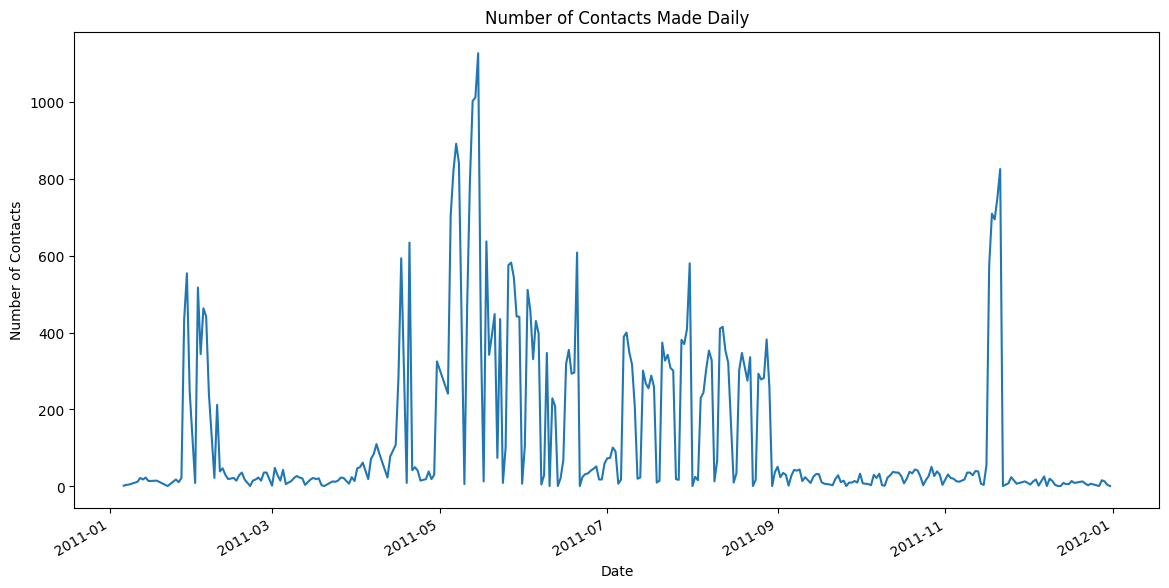

In [207]:
# Convert day and month to datetime
df['date'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-2011', format='%d-%b-%Y')
contacts_trend = df.groupby('date').size()

plt.figure(figsize=(14, 7))
contacts_trend.plot()
plt.title('Number of Contacts Made Daily')
plt.ylabel('Number of Contacts')
plt.xlabel('Date')
plt.show()

#### Composite Feature Creation

Combine `housing` and `loan` to create a composite feature named `financial_status` with the following categories:
- Both: If a client has both a housing loan and a personal loan.
- Housing: If a client only has a housing loan.
- Personal: If a client only has a personal loan.
- None: If a client has neither.

Investigate how the `financial_status` affects the term deposit subscription rates.

In [211]:
df['financial_status'] = 'None'

df.loc[(df['housing'] == 'yes') & (df['loan'] == 'yes'), 'financial_status'] = 'Both'
df.loc[(df['housing'] == 'yes') & (df['loan'] == 'no'), 'financial_status'] = 'Housing'
df.loc[(df['housing'] == 'no') & (df['loan'] == 'yes'), 'financial_status'] = 'Personal'

df.head()

In [214]:
# Investigating subscription rates
df[df['y'] == 'yes']['financial_status'].value_counts() / df['financial_status'].value_counts()

None        0.145334
Housing     0.080432
Personal    0.076121
Name: financial_status, dtype: float64